In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
from global_land_mask import globe
import scipy.stats as stats
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from src.regions import *
from src.pf_stats import *
from src.plotting import *

In [2]:
base_pf_stats = load_global_pf_stats()

In [3]:
pf_stats = base_pf_stats.copy()
pf_stats['observation_time'] = pd.to_datetime(pf_stats['observation_time'], format='%Y%m%d_%H:%M:%S')
pf_stats.set_index('observation_time', inplace=True)
is_land_id = globe.is_land(pf_stats['mean_latitude'], pf_stats['mean_longitude'])
is_ocean_id = globe.is_ocean(pf_stats['mean_latitude'], pf_stats['mean_longitude'])
pf_stats['area'] = pf_stats['num_pixels'] * 25
pf_stats['land_area'] = pf_stats['area'].where(is_land_id)
pf_stats['ocean_area'] = pf_stats['area'].where(is_ocean_id)

pf_stats['loc'] = pf_stats['largest_10mmhr_cluster_precip_8conn']/pf_stats['total_precip']
pf_stats['land_loc'] = pf_stats['loc'].where(is_land_id)
pf_stats['ocean_loc'] = pf_stats['loc'].where(is_ocean_id)

pf_stats['land_max_precip'] = pf_stats['max_precip'].where(is_land_id)
pf_stats['ocean_max_precip'] = pf_stats['max_precip'].where(is_ocean_id)

In [9]:
sample_freq = '1ME'
monthly_area = pf_stats['area'].resample(sample_freq).mean()
monthly_land_area = pf_stats['land_area'].resample(sample_freq).mean()
monthly_ocean_area = pf_stats['ocean_area'].resample(sample_freq).mean()

monthly_loc = pf_stats['loc'].resample(sample_freq).mean()
monthly_land_loc = pf_stats['land_loc'].resample(sample_freq).mean()
monthly_ocean_loc = pf_stats['ocean_loc'].resample(sample_freq).mean()

monthly_maxpr = pf_stats['max_precip'].resample(sample_freq).mean()
monthly_land_maxpr = pf_stats['max_precip'].where(is_land_id).resample(sample_freq).mean()
monthly_ocean_maxpr = pf_stats['max_precip'].where(is_ocean_id).resample(sample_freq).mean()

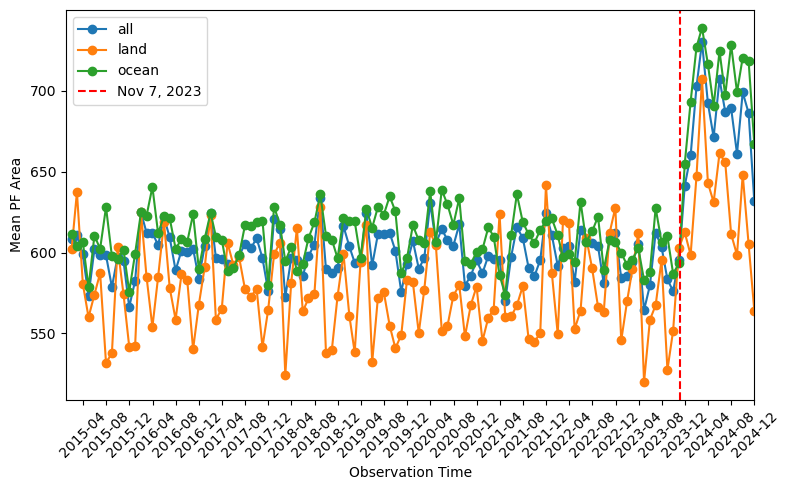

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(monthly_area.index, monthly_area.values, marker='o', linestyle='-', label='all')
ax.plot(monthly_land_area.index, monthly_land_area.values, marker='o', linestyle='-', label='land')
ax.plot(monthly_ocean_area.index, monthly_ocean_area.values, marker='o', linestyle='-', label='ocean')
# Set x-axis ticks every 6 months
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[4,8,12]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.axvline(x=pd.to_datetime('2023-11-07'), color='red', linestyle='--', label='Nov 7, 2023')


# Optionally, rotate tick labels for better readability
plt.xticks(rotation=45)

# Add labels and title
ax.set_xlabel('Observation Time')
ax.set_ylabel('Mean PF Area')
ax.set_xlim(left=pd.to_datetime('2015-01-01'), right=pd.to_datetime('2024-12-01'))
ax.legend()
fig.tight_layout()

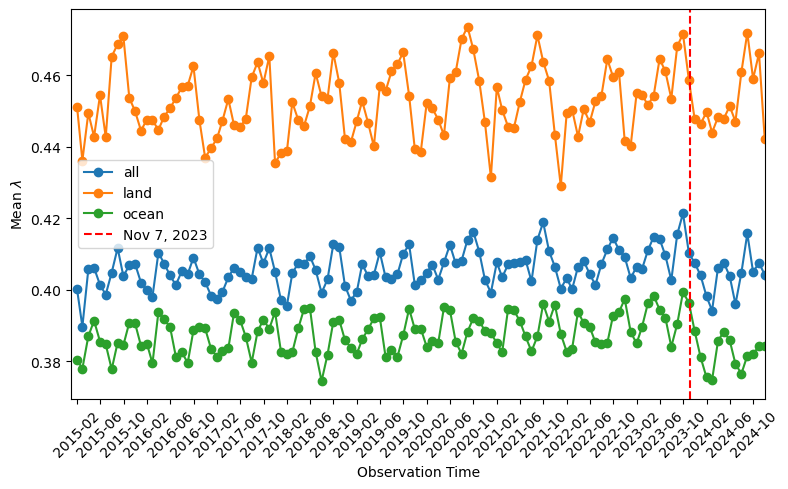

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(monthly_loc.index, monthly_loc.values, marker='o', linestyle='-', label='all')
ax.plot(monthly_land_loc.index, monthly_land_loc.values, marker='o', linestyle='-', label='land')
ax.plot(monthly_ocean_loc.index, monthly_ocean_loc.values, marker='o', linestyle='-', label='ocean')

# Set x-axis ticks every 4 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.axvline(x=pd.to_datetime('2023-11-07'), color='red', linestyle='--', label='Nov 7, 2023')

# Rotate tick labels
plt.xticks(rotation=45)

# Labels and title
ax.set_xlabel('Observation Time')
ax.set_ylabel(r'Mean $\lambda$')
ax.set_xlim(left=pd.to_datetime('2015-01-01'), right=pd.to_datetime('2024-12-01'))
ax.legend()
fig.tight_layout()

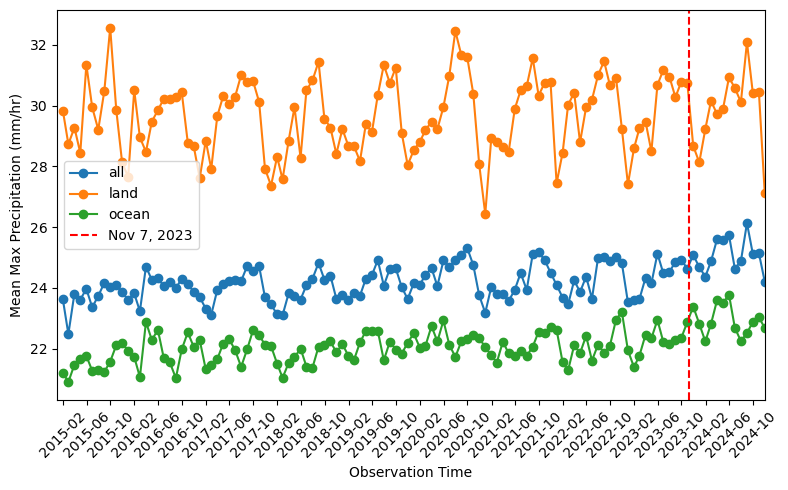

In [120]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(monthly_maxpr.index, monthly_maxpr.values, marker='o', linestyle='-', label='all')
ax.plot(monthly_land_maxpr.index, monthly_land_maxpr.values, marker='o', linestyle='-', label='land')
ax.plot(monthly_ocean_maxpr.index, monthly_ocean_maxpr.values, marker='o', linestyle='-', label='ocean')

# Set x-axis ticks every 4 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.axvline(x=pd.to_datetime('2023-11-07'), color='red', linestyle='--', label='Nov 7, 2023')

# Rotate tick labels
plt.xticks(rotation=45)

# Labels and title
ax.set_xlabel('Observation Time')
ax.set_ylabel('Mean Max Precipitation (mm/hr)')
ax.set_xlim(left=pd.to_datetime('2015-01-01'), right=pd.to_datetime('2024-12-01'))
ax.legend()
fig.tight_layout()
